# MATH 307 Assignment 4

* See [Mathematical Python](https://www.math.ubc.ca/~pwalls/math-python/) for an introduction to Python and Jupyter
* See [MATH 307 Jupyter Notebooks](https://ubcmath.github.io/MATH307/) for examples
* Run the tests to verify your solutions but note there are **hidden tests**
* Submit your `.ipynb` notebook file to Canvas

In [2]:
import numpy as np
import scipy.linalg as la
import scipy.signal as ss
import matplotlib.pyplot as plt
from scipy.io import wavfile
from IPython.display import Audio
plt.rcParams["figure.figsize"] = (18,5)


## Problem 1 (9 marks)

The code below creates a square wave with frequency $k$ periods per second using $N$ samples per second.

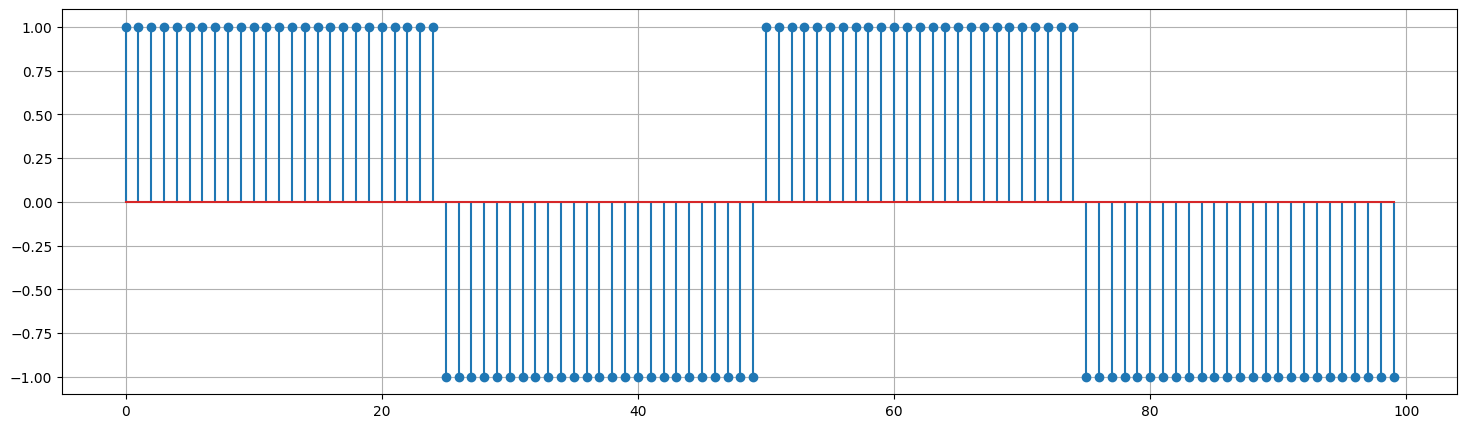

In [3]:
N = 100
t = np.arange(N)/N
k = 2
x_square = ss.square(2*np.pi*k*t)
plt.stem(x_square)
plt.grid(True)
plt.show()

(a) Create a square wave with frequency $k=8$ periods per second using with $N=128$ samples per second. Save the result as `x1`.

In [5]:
# YOUR CODE HERE
N = 128
t = np.arange(N)/N
k = 8
x1 = ss.square(2*np.pi*k*t) 

In [6]:
"Verify x1 is a NumPy array. (1 mark)"
assert isinstance(x1,np.ndarray)
print("Problem 1a Test 1: Success!")

Problem 1a Test 1: Success!


In [7]:
"Verify the values of x1. (1 mark)"
assert np.allclose(x1[6:10],[1,1,-1,-1])
print("Problem 1a Test 2: Success!")

Problem 1a Test 2: Success!


In [8]:
"Verify the values of x1. This cell contains hidden tests. (1 mark)"

'Verify the values of x1. This cell contains hidden tests. (1 mark)'

Visualize the signal:

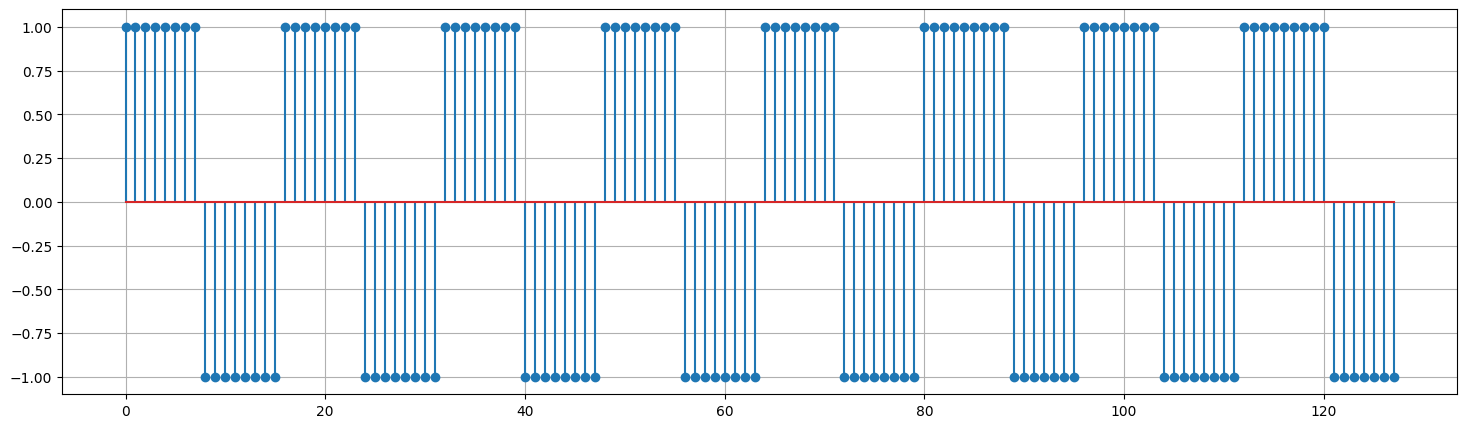

In [9]:
plt.stem(x1)
plt.grid(True)
plt.show()

(b) Compute the discrete Fourier transform of `x1` and save the result as `y1`.

In [10]:
# YOUR CODE HERE
y1 = np.fft.fft(x1)

In [11]:
"Verify y1 is a NumPy array with complex values. (1 mark)"
assert isinstance(y1,np.ndarray) and isinstance(y1[0],np.complex128)
print("Problem 1b Test 1: Success!")

Problem 1b Test 1: Success!


In [12]:
"Verify the values of y1. (1 mark)"
assert np.allclose(y1[1],1.0823922+2.61312593j)
print("Problem 1a Test 2: Success!")

Problem 1a Test 2: Success!


In [13]:
"Verify the values of y1. This cell contains hidden tests. (1 mark)"

'Verify the values of y1. This cell contains hidden tests. (1 mark)'

Visualize the result:

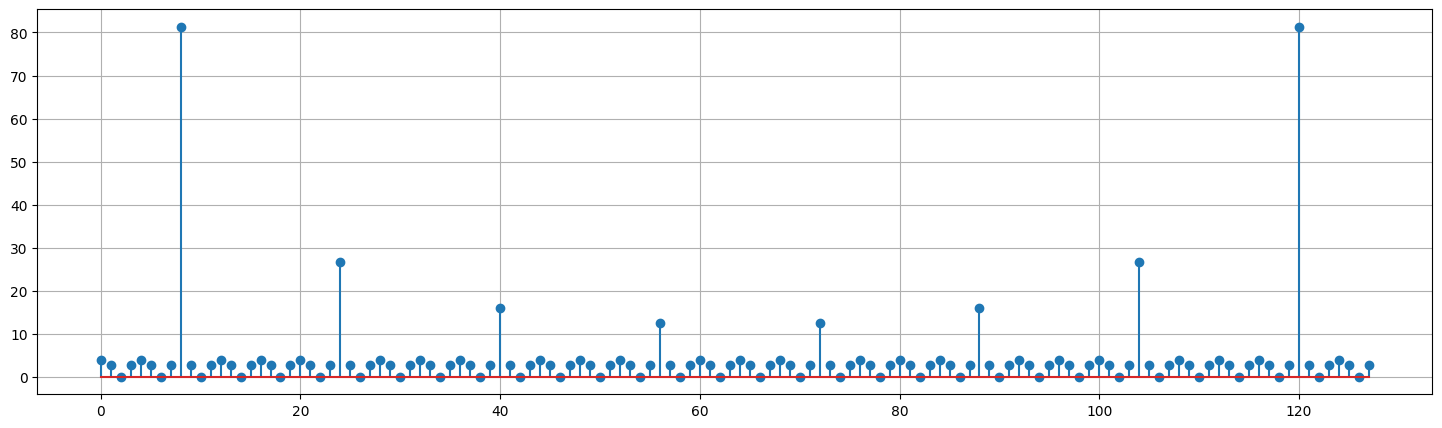

In [14]:
plt.stem(np.abs(y1))
plt.grid(True)
plt.show()

(c) The square wave `x1` is dominated by 4 main frequencies. Save the list of integers in increasing order (like `[1,2,3,4,5]`) as `x1_freqs`.

In [18]:
# YOUR CODE HERE
x1_freqs = [8,24,40,56]

In [19]:
"Verify x1_freqs is a list. (1 mark)"
assert isinstance(x1_freqs,list)
print("Problem 1c Test 1: Success!")

Problem 1c Test 1: Success!


In [20]:
"Verify the values of x1_freqs. (1 mark)"
assert np.allclose(x1_freqs[0],8)
print("Problem 1c Test 2: Success!")

Problem 1c Test 2: Success!


In [21]:
"Verify the values of x1_freqs. This cell contains hidden tests. (1 mark)"

'Verify the values of x1_freqs. This cell contains hidden tests. (1 mark)'

Just for fun ... the code below creates a C major 7 chord with square waves!

In [22]:
N = 44100
t = np.arange(N)/N
ks = [261,330,392,494]
chord = sum([ss.square(2*np.pi*k*t) for k in ks])
Audio(chord,rate=N)

## Problem 2 (6 marks)

The cell below loads a sound file `example.wav` as a NumPy array `x2`, records the sample rate `rate` and then allows us to play the sound in the notebook. Note that the sound has some noise and our goal is to filter it out.

In [23]:
rate,x2 = wavfile.read('example.wav')

Audio(x2,rate=rate)

(a) Compute the discrete Fourier transform of `x2` and save the result as `y2`.

In [24]:
# YOUR CODE HERE
y2 = np.fft.fft(x2) 

In [25]:
"Verify y2 is a NumPy array with complex values. (1 mark)"
assert isinstance(y2,np.ndarray) and isinstance(y2[0],np.complex128)
print("Problem 2a Test 1: Success!")

Problem 2a Test 1: Success!


In [26]:
"Verify the values of y2. (1 mark)"
assert np.allclose(y2[0],-865729.2483320391)
print("Problem 2a Test 2: Success!")

Problem 2a Test 2: Success!


In [27]:
"Verify the values of y2. This cell contains hidden tests. (1 mark)"

'Verify the values of y2. This cell contains hidden tests. (1 mark)'

(b) The cells below plot the magnitude of the first 300 frequencies in the Fourer transform `y2` and `y2_filtered`. Compute the inverse Fourier transform of `y2_filtered` and use `np.real` to convert the entries to real numbers and save the result as `x2_filtered`. Play the audio and see if it sounds less noisy.

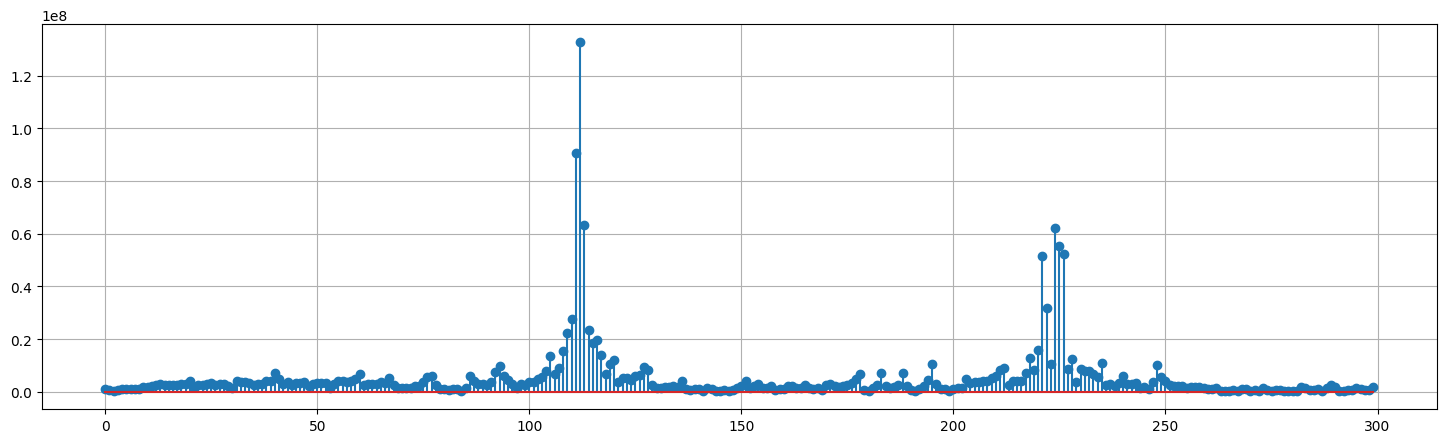

In [28]:
plt.stem(np.abs(y2[:300]))
plt.grid(True)
plt.show()

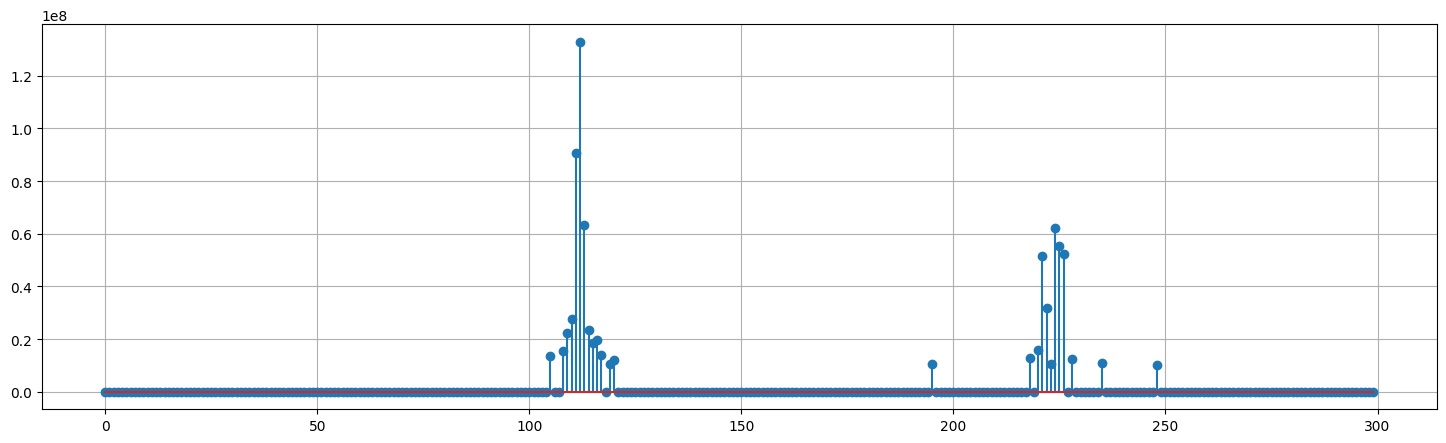

In [29]:
y2_filtered = y2.copy()
y2_filtered[np.abs(y2) < 1e7] = 0.0

plt.stem(np.abs(y2_filtered[:300]))
plt.grid(True)

plt.show()

In [30]:
# YOUR CODE HERE
x2_filtered = np.fft.ifft(y2_filtered).real 

In [31]:
"Verify x2_filtered is a NumPy array with real values. (1 mark)"
assert isinstance(x2_filtered,np.ndarray) and isinstance(x2_filtered[0],np.float64)
print("Problem 2b Test 1: Success!")

Problem 2b Test 1: Success!


In [32]:
"Verify the values of x2_filtered. (1 mark)"
assert np.allclose(x2_filtered[0],-2459.67554688)
print("Problem 2b Test 2: Success!")

Problem 2b Test 2: Success!


In [33]:
"Verify the values of x2_filtered. This cell contains hidden tests. (1 mark)"

'Verify the values of x2_filtered. This cell contains hidden tests. (1 mark)'

In [34]:
Audio(x2_filtered.real,rate=rate)